# 1 Дз по МатСтату [1 задача]

## Выполнено Юдиной Екатериной БПИ198

In [69]:
import math
import scipy
from scipy import stats
import itertools 

In [70]:
import numpy as np
import sympy
from sympy import nsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
import random

$\textit{Пункт а)}\newline
\textit{Рассчитайте 90 % доверительный интервал для средней продолжительности, считая распределение признака нормальным.}$

$\underline{Решение:}$

Дано [начальная выборка duration_1]:

In [72]:
list=[31,
12,
28,
33,
23,
34,
9,
18,
26,
25,
18,
33,
12,
28,
11,
22,
32,
26,
22,
29]

Найдем доверительный интервал по формуле:
$P(\bar{X}-t_{\frac{\alpha}{2},n-1}\frac{\hat{\sigma}}{\sqrt{n}}<\mu<\bar{X}+t_{\frac{\alpha}{2},n-1}\frac{\hat{\sigma}}{\sqrt{n}})=1-\alpha $
$\newline{}$ Для этого найдем $\bar{X}=\frac{\sum^n_{i=1} X_i}{n}$ и $\hat {\sigma}^2=\frac{1}{n+1}\sum^n_{i=1}(X_i-\bar{X})^2$

Выборочное среднее $\bar{X}$:

In [73]:
sum=0 #Сумма всех входных X_i
k=0 # Число всех X_i (n)
for i in list:
    sum+=i
    k+=1
    
x=sum/k # \bar{X}
x

23.6

Cкорректированная выборочная дисперсия $\hat {\sigma}$:

In [74]:
sum2=0 # Сумма для нахождения \hat\sigma^2
for i in list:
    sum2+=(i-x)**2
sigma2=1/(k-1)*sum2 #\hat\sigma^2
sigma=math.sqrt(sigma2) #\hat\sigma
sigma

7.9498427657407165

Квантиль Стьюдента (найден по таблице):

In [75]:
t=1.729 #t_{0.05,19} [найдено по таблице]

$\bar{X}=23.6$
<br>
$\hat {\sigma}=7.95$
<br>
$t_{0.05,19}=1.729$

Левая граница интервала

In [76]:
left=x-t*sigma/math.sqrt(k) #Левая граница интервала

left

20.526462370492272

Правая граница интервала

In [77]:
right=x+t*sigma/math.sqrt(k) #Правая граница интервала
right

26.67353762950773

$\textbf{Ответ: (20.53, 26.67)}$

-------------------------------------------------------------------------------------------------------------------------------

$\textit{Пункт б)}\newline
\textit{Постройте график «квантиль-квантиль» и попробуйте понять, соответствует ли распределение времени вскармливания нормальному закону.}$

$\underline{Решение:}$

Для того чтобы пострить данный график необходимо найти:
<br>
-выборочные квантили
<br>
-теоретические квантили

Выборочные квантили - это отсортированный список выборки (те $X_{(1)},..X_{(n)}$)

In [78]:
list.sort() #Выборочные квантили [\hat{Q}]
list

[9, 11, 12, 12, 18, 18, 22, 22, 23, 25, 26, 26, 28, 28, 29, 31, 32, 33, 33, 34]

Рассчитываем квантили нормального распределения с параметрами $\mu=\bar{X}$ и $\sigma^2=\hat{\sigma}^2$ («теоретические» квантили):
<br>
$Q(\frac{1}{n+1})=\bar{X}+\hat{\sigma}\Phi^{-1}(\frac{1}{n+1})$
<br>..<br>
$Q(\frac{n}{n+1})=\bar{X}+\hat{\sigma}\Phi^{-1}(\frac{n}{n+1})$

In [79]:
listquantile=[]#Лист Ф**-1
for i in range (1,k+1):
    listquantile.append((scipy.stats.norm.ppf(i/(k+1))))
    
listquantile    

[-1.6683911939470795,
 -1.309171716785777,
 -1.0675705238781414,
 -0.8761428492468408,
 -0.712443032389489,
 -0.5659488219328631,
 -0.43072729929545756,
 -0.30298044805620655,
 -0.1800123697927051,
 -0.05971709978532289,
 0.05971709978532289,
 0.18001236979270496,
 0.30298044805620655,
 0.43072729929545744,
 0.5659488219328631,
 0.7124430323894889,
 0.8761428492468408,
 1.0675705238781412,
 1.309171716785777,
 1.668391193947079]

In [80]:
theoretiqalQ=[]#Теоретические квантили
for (i,f) in itertools.zip_longest (list,listquantile):
    theoretiqalQ.append( x+sigma*f)
    
theoretiqalQ

[10.336552336374295,
 13.192290698198237,
 15.112982193829332,
 16.634802108159544,
 17.936189912956042,
 19.100795852177548,
 20.175785695688973,
 21.191353076859485,
 22.168929964259622,
 23.125258446280636,
 24.074741553719367,
 25.03107003574038,
 26.008646923140518,
 27.02421430431103,
 28.099204147822455,
 29.263810087043957,
 30.56519789184046,
 32.08701780617067,
 34.00770930180177,
 36.863447663625706]

$\textbf{График:}$

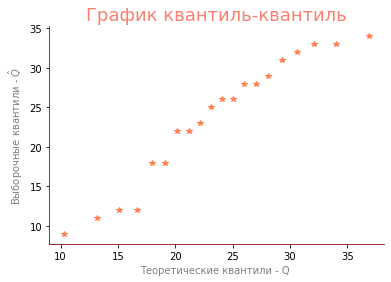

In [81]:
plt.plot()
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('maroon')
ax.spines['bottom'].set_color('maroon')

plt.title('График квантиль-квантиль', fontsize=18, color='salmon')
plt.xlabel('Теоретические квантили - Q ', color='gray')
plt.ylabel(r'Выборочные квантили - $\hat{Q}$',color='gray')

x = sympy.Symbol('x')

#Создаем множество точек
X = theoretiqalQ
Y=list

#Строим левую часть функции
plt.plot(X, Y,'*',color='coral')

Расположение точек напоминает прямую $\longrightarrow$ распределение нормально

-------------------------------------------------------------------------------------------------------------------------------

$\textit{Пункт в)}\newline
 \textit{Прочитайте ниже описание бутстрапа и рассчитайте этим методом 90% доверительный
интервал для средней продолжительности вскармливания, сгенерировав 1000 перевыборок.}$

$\underline{Решение:}$

Найдем доверительный интервал уровня 0.1. То есть необходимо найти квантили уровня $\hat{Q}(\alpha/2)$ (0.05) и $\hat{Q}(1-\alpha/2)$ (0.95) (Эти квантили и будут являться границами интервала). <br>
Сгенерируем 1000 перевыборок <br>
Найдем выборочные квантили <br>
\[Для этого: <br>
Найдем средние по  каждой перевыборке <br>
Отсортируем их \]<br>
И затем возьмем 50 и 950 элемент в данном отсортированном списке квантилей (это и будут нужные нам границы)

Начальные данные:

In [82]:
list=[31,
12,
28,
33,
23,
34,
9,
18,
26,
25,
18,
33,
12,
28,
11,
22,
32,
26,
22,
29]

Сначала создадим лист из 1000 перевыборок

In [83]:
reselection=[] # Лист перевыборок
for i in range (1000):
    reselection.append([])
    for j in range (20):
        element=list[random.randint(0, 19)]
        reselection[i].append(element)
    
reselection
      

[[9,
  34,
  26,
  25,
  18,
  28,
  26,
  23,
  32,
  28,
  34,
  28,
  22,
  29,
  12,
  28,
  22,
  26,
  32,
  22],
 [11,
  28,
  25,
  23,
  33,
  32,
  22,
  29,
  26,
  18,
  33,
  9,
  29,
  28,
  9,
  26,
  26,
  31,
  33,
  23],
 [12,
  26,
  25,
  31,
  28,
  22,
  28,
  28,
  11,
  22,
  11,
  34,
  23,
  12,
  18,
  12,
  12,
  22,
  32,
  34],
 [22,
  9,
  22,
  12,
  25,
  11,
  33,
  25,
  23,
  33,
  31,
  25,
  28,
  22,
  18,
  26,
  9,
  28,
  18,
  12],
 [22,
  23,
  22,
  26,
  33,
  9,
  29,
  22,
  31,
  32,
  31,
  29,
  33,
  29,
  9,
  18,
  28,
  33,
  23,
  22],
 [12,
  23,
  22,
  28,
  32,
  22,
  33,
  11,
  18,
  28,
  11,
  18,
  32,
  26,
  12,
  26,
  26,
  22,
  22,
  9],
 [34,
  18,
  29,
  33,
  22,
  18,
  28,
  32,
  31,
  31,
  18,
  28,
  23,
  26,
  33,
  12,
  22,
  29,
  33,
  18],
 [22,
  22,
  28,
  34,
  32,
  34,
  22,
  11,
  31,
  28,
  25,
  22,
  33,
  29,
  25,
  22,
  25,
  32,
  25,
  34],
 [34,
  23,
  23,
  26,
  18,
  33,
  29

Найдем средние для каждой перевыборки

In [84]:
knew=1000 #Всего количество перевыборок
xlist=[] #Среднее в каждой перевыборке
for i in range (knew):
    sum=0
    for j in range (20):
        sum+=reselection[i][j]
    xlist.append(sum/k)

Отсортируем средние (это и будут выборочные квантили)

In [85]:
xlist.sort()

Найдем кваниль уровня 0.5

In [86]:
xlist[50]

20.85

Найдем кваниль уровня 0.95

In [87]:
xlist[950]

26.5

Соответственно границы интервала будут (20.85, 26.5)

$\textbf{Ответ: (20.85, 26.5)}$

-------------------------------------------------------------------------------------------------------------------------------

$\textit{Пункт г)}\newline
\textit{ При выполнении предыдущего пункта вы получите 1000 средних значений
продолжительности вскармливания в перевыборках. Постройте гистограмму для этих
значений. Похоже ли распределение среднего в перевыборках на нормальное?}$

$\underline{Решение:}$

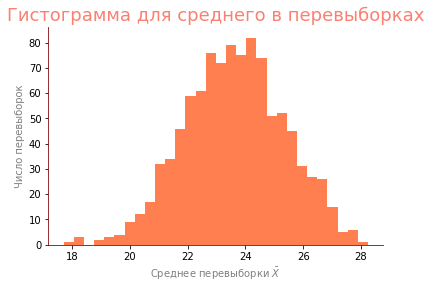

In [88]:
# Построение гистограммы:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('maroon')
ax.spines['bottom'].set_color('maroon')

plt.title("Гистограмма для среднего в перевыборках",fontsize=18,color='salmon')
plt.xlabel(r'Среднее перевыборки $\bar{X}$',color='grey')
plt.ylabel('Число перевыборок', color='grey')

n, bin, patches = plt.hist(xlist, bins=30,color='coral')


plt.show()

Данный график похож на колокол, распределение похоже на нормальное